In [1]:
import os
from exorim import PhysicalModel
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
np.set_printoptions(threshold=100)

2022-03-30 16:08:43.831239: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-30 16:08:43.831263: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-03-30 16:08:44.959878: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-30 16:08:44.959899: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-30 16:08:44.959912: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (TARS): /proc/driver/nvidia/version does not exist
2022-03-30 16:08:44.960135: I tensorflow/core/platform/cpu_feature_guard

In [2]:
data = fits.open(os.path.join(os.getenv("EXORIM_PATH"), "data", "pa0_con0.01_bkgd_.oifits"))

# Convention from oifits

# Triangles have coordinates

# $ [u_1, u_2, -(u_1 + u_2)], [v_1, v_2, -(v_1 + v_2)]$

In [3]:
data.info()

Filename: /home/alexandre/Desktop/Projects/ExoRIM/data/pa0_con0.01_bkgd_.oifits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      18   ()      
  1  OI_WAVELENGTH    1 BinTableHDU     17   1R x 2C   [1E, 1E]   
  2  OI_TARGET     1 BinTableHDU     56   1R x 17C   [1I, 16A, 1D, 1D, 1E, 1D, 1D, 1D, 8A, 8A, 1D, 1D, 1D, 1D, 1E, 1E, 16A]   
  3  OI_ARRAY      1 BinTableHDU     32   7R x 7C   [16A, 16A, 1I, 1E, 3D, 1D, 6A]   
  4  OI_VIS2       1 BinTableHDU     38   21R x 10C   [1I, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 2I, 1L]   
  5  OI_T3         1 BinTableHDU     50   35R x 14C   [1I, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 3I, 1L]   


In [6]:
data["PRIMARY"].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                    8 / array data type                                
NAXIS   =                    0 / number of array dimensions                     
EXTEND  =                    T                                                  
DATE    = '2022-02-02'                                                          
ORIGIN  = 'Sydney University'                                                   
CONTENT = 'OIFITS2 '                                                            
DATE-OBS= '2022-04-01'                                                          
TELESCOP= ''                                                                    
INSTRUME= ''                                                                    
OBSERVER= ''                                                                    
OBJECT  = 'fakebinary'                                                          
INSMODE = 'NRM     '        

In [13]:
data["OI_TARGET"].data

FITS_rec([(1, 'fakebinary', 0., 0., 2000., 0., 0., 0., 'UNKNOWN', 'OPTICAL', 0., 0., 0., 0., 0., 0., 'fake')],
         dtype=(numpy.record, [('TARGET_ID', '>i2'), ('TARGET', 'S16'), ('RAEP0', '>f8'), ('DECEP0', '>f8'), ('EQUINOX', '>f4'), ('RA_ERR', '>f8'), ('DEC_ERR', '>f8'), ('SYSVEL', '>f8'), ('VELTYP', 'S8'), ('VELDEF', 'S8'), ('PMRA', '>f8'), ('PMDEC', '>f8'), ('PMRA_ERR', '>f8'), ('PMDEC_ERR', '>f8'), ('PARALLAX', '>f4'), ('PARA_ERR', '>f4'), ('SPECTYP', 'S16')]))

In [21]:
data["OI_ARRAY"].data["STAXYZ"]

array([[ 0.     , -2.64   ,  0.     ],
       [-2.28631,  0.     ,  0.     ],
       [ 2.28631, -1.32   ,  0.     ],
       [-2.28631,  1.32   ,  0.     ],
       [-1.14315,  1.98   ,  0.     ],
       [ 2.28631,  1.32   ,  0.     ],
       [ 1.14315,  1.98   ,  0.     ]])

In [43]:
data["OI_T3"].data

FITS_rec([(1, 0., 58886.03762731, 0.8, 0., 0., -1.47896458e+00, 3.89504535e-08, -2.28631, -2.64,  4.57262,  1.32, [1, 2, 3],  0),
          (1, 0., 58886.03762731, 0.8, 0., 0.,  7.34028118e-02, 2.02762240e-09, -2.28631, -2.64, -0.     , -1.32, [1, 2, 4],  0),
          (1, 0., 58886.03762731, 0.8, 0., 0., -9.11979001e-01, 2.39866335e-08, -2.28631, -2.64,  1.14316, -1.98, [1, 2, 5],  0),
          (1, 0., 58886.03762731, 0.8, 0., 0.,  7.36367499e-02, 1.69703514e-09, -2.28631, -2.64,  4.57262, -1.32, [1, 2, 6],  0),
          (1, 0., 58886.03762731, 0.8, 0., 0., -9.11872879e-01, 2.50189141e-08, -2.28631, -2.64,  3.42946, -1.98, [1, 2, 7],  0),
          (1, 0., 58886.03762731, 0.8, 0., 0.,  7.54198674e-02, 2.42875431e-09,  2.28631, -1.32, -4.57262, -2.64, [1, 3, 4],  0),
          (1, 0., 58886.03762731, 0.8, 0., 0., -4.63045850e-01, 1.30518613e-08,  2.28631, -1.32, -3.42946, -3.3 , [1, 3, 5],  0),
          (1, 0., 58886.03762731, 0.8, 0., 0.,  7.66574579e-02, 1.57661621e-09,  2.28631, 

In [5]:
data["OI_T3"].data["T3PHIERR"]

array([3.89504535e-08, 2.02762240e-09, 2.39866335e-08, 1.69703514e-09,
       2.50189141e-08, 2.42875431e-09, 1.30518613e-08, 1.57661621e-09,
       1.23254278e-08, 8.49808094e-10, 6.56154194e-10, 8.73307762e-10,
       4.15604516e-10, 2.30777405e-10, 4.04845936e-10, 4.27038824e-08,
       2.90719191e-08, 4.17414903e-08, 2.86478350e-08, 2.19138817e-08,
       1.60007915e-10, 2.45005448e-08, 2.58057836e-08, 2.09802689e-10,
       2.62021659e-08, 1.51904980e-08, 3.45002445e-10, 1.47290778e-08,
       1.38497576e-08, 2.25626786e-10, 1.24482928e-08, 1.39426544e-10,
       2.00296288e-10, 1.42155408e-10, 1.97740217e-10])

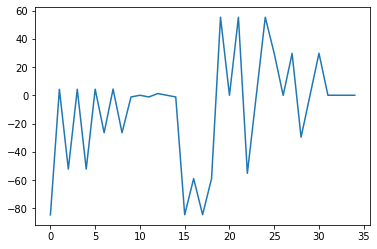

In [36]:
# Note to self, the telescope are organised in lexicographic order. Is that how we order things in the Operator class? If so, we can pass this data directly into the RIM.
plt.plot(data["OI_T3"].data["T3PHI"]*180/np.pi)

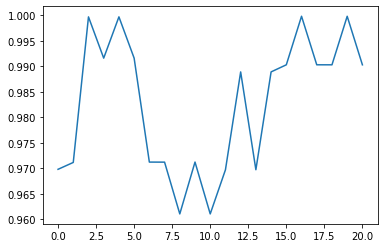

In [7]:
plt.plot(data["OI_VIS2"].data["VIS2DATA"])

In [39]:
data["OI_VIS2"].data

FITS_rec([(1, 0., 58886.03762731, 0.8, 0.96983253, 1.93271771e-16, -2.28631, -2.64, [1, 2],  0),
          (1, 0., 58886.03762731, 0.8, 0.97117913, 1.38629237e-16,  2.28631, -1.32, [1, 3],  0),
          (1, 0., 58886.03762731, 0.8, 0.99971878, 8.39266246e-17, -2.28631, -3.96, [1, 4],  0),
          (1, 0., 58886.03762731, 0.8, 0.99163161, 2.36588480e-16, -1.14315, -4.62, [1, 5],  0),
          (1, 0., 58886.03762731, 0.8, 0.99972409, 1.78551750e-16,  2.28631, -3.96, [1, 6],  0),
          (1, 0., 58886.03762731, 0.8, 0.99162996, 2.71762781e-16,  1.14315, -4.62, [1, 7],  0),
          (1, 0., 58886.03762731, 0.8, 0.97124932, 2.00577922e-16,  4.57262,  1.32, [2, 3],  0),
          (1, 0., 58886.03762731, 0.8, 0.97123788, 1.91833279e-16, -0.     , -1.32, [2, 4],  0),
          (1, 0., 58886.03762731, 0.8, 0.96108798, 1.31623114e-16,  1.14316, -1.98, [2, 5],  0),
          (1, 0., 58886.03762731, 0.8, 0.97125612, 2.42396059e-16,  4.57262, -1.32, [2, 6],  0),
          (1, 0., 58886.037627

In [6]:
data["OI_VIS2"].data["VIS2ERR"]

array([1.93271771e-16, 1.38629237e-16, 8.39266246e-17, 2.36588480e-16,
       1.78551750e-16, 2.71762781e-16, 2.00577922e-16, 1.91833279e-16,
       1.31623114e-16, 2.42396059e-16, 2.66451408e-16, 2.14117259e-16,
       2.12425474e-16, 1.75250879e-16, 2.46890408e-16, 2.16329619e-16,
       1.97562654e-16, 1.61025668e-16, 1.52136900e-16, 1.71574728e-16,
       1.07885878e-16])

In [49]:
mask_coordinates = data["OI_ARRAY"].data["STAXYZ"][..., :2]
phys = PhysicalModel(pixels=32, mask_coordinates=mask_coordinates, redundant=True)  # full redundant array is given in oifits
mask_coordinates

array([[ 0.     , -2.64   ],
       [-2.28631,  0.     ],
       [ 2.28631, -1.32   ],
       [-2.28631,  1.32   ],
       [-1.14315,  1.98   ],
       [ 2.28631,  1.32   ],
       [ 1.14315,  1.98   ]])

In [50]:
phys.CPO.shape

TensorShape([35, 21])